
\begin{center}
Chun-Yuan (Scott) Chiu
\end{center}
\begin{center}
chunyuac@andrew.cmu.edu
\end{center}

# 1. {-}

## 1.1 {-}

The KDE of the ask price shown below has a long right tail. Later we will show that all ask prices greater than 14 are of in-the-money options. According to the KDE there is a probability an option's ask price will go negative, which is clearly a mistake. 

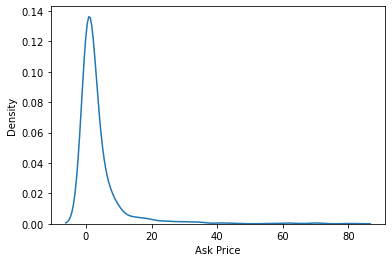

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('optionssample09302017.txt')

ax = sns.kdeplot(df['ask'])
ax.set(xlabel='Ask Price')
plt.show()

Since this is a call option data set, out-of-the-money (OTM) means the strike price is great than the current underlying stock price while in-the-money (ITM) means the opposite. We add an ```OTM``` column to indicate if data point is an OTM option or ITM. We then sort the data by ask prices in descending order and find the first OTM data point, which is equivalent to finding the ITM data point that has the largest ask price. The result below shows that all ask prices that are greater than 14 are of ITM options. 

In a usual market condition, all other specifications being equal, the deeper ITM an option is, the lower liquidity it has. 

In [56]:
df['OTM'] = df['curprice'] < df['strike']

df.sort_values(by='ask', ascending=False).reset_index(drop=True)['OTM'].idxmax()

62

In [59]:
df.sort_values(by='ask', ascending=False).reset_index(drop=True)[57:65]

,symbol,timetoexpiry,strike,last,bid,ask,volume,openint,curprice,histvol,implvol,bsval,OTM
57,KWR,111,140.0,12.00,10.6,15.0,10,10,147.949997,0.166228,0.333689,10.164936,False
58,EL,111,95.0,15.93,13.9,14.6,30,294,107.839996,0.126326,0.277030,12.935714,False
59,MCD,76,145.0,12.95,12.5,14.4,331,1495,156.679993,0.192664,0.258101,13.056439,False
60,GOL,20,7.5,13.20,12.6,14.3,38,0,21.139999,0.536376,3.851604,13.639999,False
61,WD,139,40.0,14.14,12.8,13.7,5,5,52.330002,0.266936,0.484798,12.492308,False
62,ROP,230,250.0,13.40,12.4,13.7,61,61,243.399994,0.151731,0.215235,8.837670,True
63,LLY,111,72.5,12.60,13.2,13.6,14,2264,85.540001,0.135621,0.244138,13.067840,False
64,ALSN,230,25.0,10.70,11.8,13.6,2,2,37.529999,0.228210,0.519830,12.553921,False


## 1.2 {-}

Below are the scatter plots and the nonparametric smooth curves. 

For historical volatility, although the data shows a slight downward trend, there is no obvious reason to believe that the larger the ask price is, the lower the historical volatility should be, especially without all other information like time to expiry and strike. 

For time to expiry, the data shows a slight upward trend. Here is one possible explanation. An option with a long life usually has a higher price, simply because given a longer time horizon the option has a larger probability to expire ITM. That is why there is no data point in the top left corner of the scatter plot. We see 3 data points with time to expiry over 800 days. They all have relatively large ask prices. There are also some data points with time to expiry close to 500 days, among which the smallest ask price is around 0.1. From the scatter plot we can also see that options with time to expiry 200 days can have ask prices less than 0.1. In general there is a clear trend that the smallest ask price given a fixed time to expiry goes up with the time to expiry. Hence the observed upward trend. 

For strike, the data shows a clear upward trend, which makes sense. In a usual market condition, the deeper OTM or ITM an option is, the lower the liquidity. Each observation represents a trade happened, which means it is likely not too far ITM or OTM, in which case the strike is not to far off the current price of the underlying stock. So, roughly speaking, high strike means high current price, which means high option price, hence the upward trend. We also see that the nonparametric smooth is convex. This is because we use log scale for the ask price. Had we use the linear scale, the curve will be close to linear. 

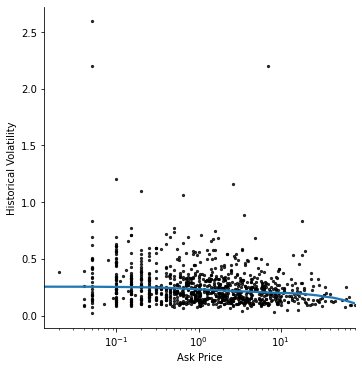

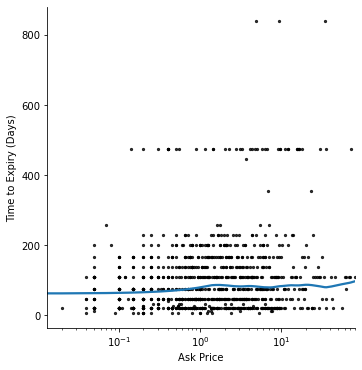

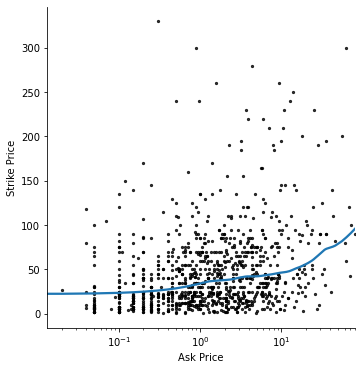

In [4]:
ylabel = {'histvol': 'Historical Volatility', 
        'timetoexpiry': 'Time to Expiry (Days)', 
          'strike': 'Strike Price'} 

for response in ['histvol', 'timetoexpiry', 'strike']:
    grid = sns.lmplot(data=df, x='ask', y=response, lowess=True, scatter_kws={'s': 5, 'color': 'black'})
    grid.set(xscale='log', xlabel='Ask Price', ylabel=ylabel[response])
    
plt.show()

# 2. {-}

## Step 1, 2, 3 {-}

If we randomly choose exactly 200 tickers, some of them might not have data in January and February of 2020 for various reasons like IPO, so we choose 250 instead. 

In [ ]:
from get_all_tickers import get_tickers as gt
import numpy as np

np.random.seed(0)

NYSEtickers = gt.get_tickers(NYSE=True,NASDAQ=False,AMEX=False)
tickers = np.random.choice(NYSEtickers, 250, replace=False)

In [94]:
import yfinance as yf
df = yf.download(tickers, start="2020-01-01", end="2020-03-01")['Close']

[*********************100%***********************]  250 of 250 completed

16 Failed downloads:
- UZD: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- SCA: No data found for this date range, symbol may be delisted
- PMVC: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- BFT: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- RKT: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- EMP: No data found for this date range, symbol may be delisted
- CIXX: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- SBBA: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- IPOC: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- SAND          : No data found, symbol may be delisted
- GIX~: No data found, symbol may be delisted
- DEN: No data found for this date range, symbol may be delisted
- DYFN: Data doesn't exist for startDate = 1577836800, endDate = 1583020800
- S

We grab the closing price. Below is the data from the first few dates. 

In [96]:
df.head()

,AAT,ABB,ABR,ACB,ACN,ADC,ADX,APO,ARL,ARR,...,WAT,WBS,WF,WFC,WMB,WMK,WOW,WRE,WTM,YPF
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,44.980000,24.370001,14.13,24.240000,210.149994,67.660004,15.84,47.660000,16.33,18.040001,...,235.059998,53.360001,30.090000,53.750000,23.49,40.380001,7.19,29.020000,1122.900024,11.26
2020-01-03,45.880001,24.180000,14.19,24.000000,209.800003,69.260002,15.76,47.310001,16.15,18.139999,...,231.009995,53.160000,29.190001,53.419998,23.59,40.439999,7.12,29.440001,1120.689941,11.16
2020-01-06,46.220001,24.309999,14.20,22.799999,208.429993,69.980003,15.73,47.580002,15.97,18.240000,...,228.880005,52.549999,28.750000,53.099998,23.90,40.560001,7.08,29.510000,1120.250000,11.14
2020-01-07,45.340000,24.270000,14.24,21.959999,203.929993,69.989998,15.75,47.630001,16.40,18.350000,...,231.979996,52.160000,28.730000,52.660000,23.90,40.669998,7.00,29.410000,1112.119995,10.91


Then we save the data to a local csv file.

In [162]:
df.to_csv('alldata.csv')

## Step 4 {-}

There are missing values in the data, which we get rid of first. 

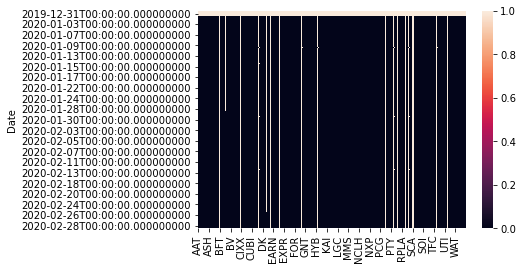

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('alldata.csv', infer_datetime_format=True, parse_dates=[0], index_col=0)

sns.heatmap(data.isna())
plt.show()

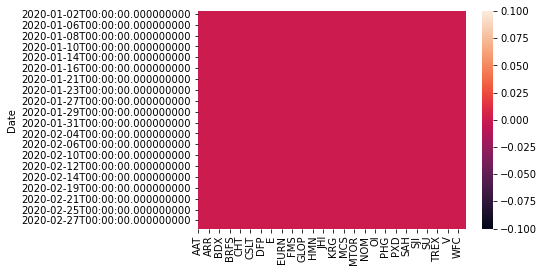

In [16]:
data = data[1:].dropna(axis='columns')

sns.heatmap(data.isna())
plt.show()

Next we take a subset of data from 200 tickers and standardize each row. We also construct separate DataFrames for data from January and February only. There are 21 and 19 trading days in January and February, respectively. 

In [17]:
data = data.T[:200]

data = data.sub(data.mean(axis='columns'), axis='index').div(data.std(axis='columns'), axis='index')

dataJan = data.T[data.columns.month==1].T
dataFeb = data.T[data.columns.month==2].T

dataJan.shape, dataFeb.shape

((200, 21), (200, 19))

Below is to confirm that the data is standardized to have mean zero and variance 1. 

In [18]:
data.mean(axis='columns')

AAT    9.214851e-16
ABB   -1.332268e-15
ABR    7.882583e-16
ACB    6.439294e-16
ACN   -9.325873e-16
           ...     
SOL   -1.065814e-15
SRL   -7.105427e-16
STT    7.771561e-16
SU    -2.553513e-16
SUM    2.664535e-16
Length: 200, dtype: float64

In [19]:
data.std(axis='columns')

AAT    1.0
ABB    1.0
ABR    1.0
ACB    1.0
ACN    1.0
      ... 
SOL    1.0
SRL    1.0
STT    1.0
SU     1.0
SUM    1.0
Length: 200, dtype: float64

## Step 5 {-}

To perform the nonparametric smooth with optimal span for each ticker, we first need to find the optimal span using R. Below we transpose the data matrix for January and February and add ```range(21)``` and ```range(19)``` to the data as the predictor, representing indices of the trading dates. 

In [20]:
dataJanR = dataJan.T
dataJanR['dateIdx'] = range(21)

dataFebR = dataFeb.T
dataFebR['dateIdx'] = range(19)

In [21]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [22]:
%%R -i dataJanR -o optspanJan

library(fANCOVA)

optspanJan <- list()

for (ticker in colnames(dataJanR))
{
    holdlo = loess.as(dataJanR$dateIdx, dataJanR[[ticker]], criterion='aicc')
    optspanJan[[ticker]] <- holdlo$pars$span
}

In [23]:
%%R -i dataFebR -o optspanFeb

library(fANCOVA)

optspanFeb <- list()

for (ticker in colnames(dataFebR))
{
    holdlo = loess.as(dataFebR$dateIdx, dataFebR[[ticker]], criterion='aicc')
    optspanFeb[[ticker]] <- holdlo$pars$span
}

The output of the R cells are ```rpy2.robjects.vectors.ListVector``` objects which support the ```items()``` method that lets us convert them to python dictionaries. 

In [24]:
spanJan = {k: v[0] for k, v in optspanJan.items()}
spanFeb = {k: v[0] for k, v in optspanFeb.items()}

Below are the scatter plots and the regression lines of the SD of the (standardized) prices with and without smoothing. There is a clear downward trend, which is because we have standardized the data. 


Specifically, given an arbitrary ticker, let the sequences $\{x_{1, i}\}$ and $\{x_{2, i}\}$ be the standardized prices in January and February, respectively. Let $m_1$ and $m_2$ be the mean of the $\{x_{1, i}\}$ and $\{x_{2, i}\}$, respectively, and $s_1$ and $s_2$ be their standard deviations. Each point on the scatter plot is an $(s_1, s_2)$ pair. Note that 
\begin{align*}
s_1 &= \sqrt{\frac{\sum_{i=1}^{21} (x_{1, i} - m_1)^2}{20}}, \\
s_2 &= \sqrt{\frac{\sum_{i=1}^{19} (x_{2, i} - m_2)^2}{18}}, \\
\end{align*}
or equivalently, 
\begin{align*}
20s_1^2 &= \sum_{i=1}^{21} x_{1, i}^2 - 2m_1 \sum_{i=1}^{21}x_{1, i} + 21m_1^2, \\
18s_2^2 &= \sum_{i=1}^{19} x_{2, i}^2 - 2m_2 \sum_{i=1}^{19}x_{2, i} + 19m_2^2. \\
\end{align*}
But sum of the first terms on the right hand side of the above equations are fixed because, since the data is standardized to have mean zero and standard deviation 1, we have 
\begin{align*}
\sqrt{\frac{\sum_{i=1}^{21} x_{1, i}^2 + \sum_{i=1}^{19} x_{2, i}^2}{39}} = 1. 
\end{align*}
This means, for tickers such that the first terms on the right hand side dominate, $s_1$ and $s_2$ will be negatively correlated. In fact, for tickers such that $\sum_{i=1}^{21}x_{1, i}$ and $\sum_{i=1}^{19}x_{2, i}$ are close to zero, $m_1$ and $m_2$ will be close to zero too, in which case $20s_1^2 + 18s_2^2$ will be close to 39. That is why the scatter plot without smoothing has some data points that present a curve that looks like part of a circle. 


With smoothing, this feature goes away. 



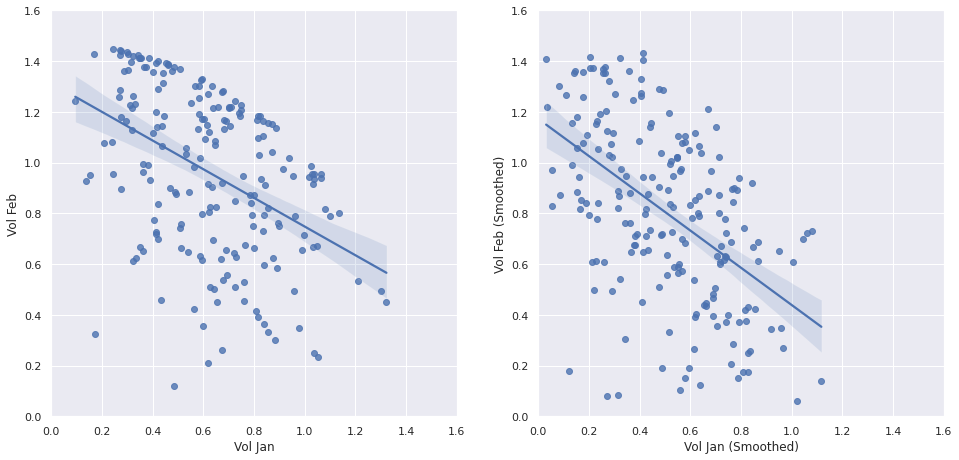

In [27]:
import statsmodels.api as sm

dataJanSmooth = dataJan.copy()
dataFebSmooth = dataFeb.copy()

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

for ticker in dataJan.index:
    lowout = sm.nonparametric.lowess(dataJan.loc[ticker], range(21), frac=spanJan[ticker])
    dataJanSmooth.loc[ticker] = lowout[:, 1]

    lowout = sm.nonparametric.lowess(dataFeb.loc[ticker], range(19), frac=spanFeb[ticker])
    dataFebSmooth.loc[ticker] = lowout[:, 1]

data['Vol Jan'] = dataJan.std(axis='columns')
data['Vol Feb'] = dataFeb.std(axis='columns')
data['Vol Jan (Smoothed)'] = dataJanSmooth.std(axis='columns')
data['Vol Feb (Smoothed)'] = dataFebSmooth.std(axis='columns')

sns.set(rc={'figure.figsize':(8, 8)})
sns.regplot(x='Vol Jan', y='Vol Feb', data=data, ax=axs[0])
sns.regplot(x='Vol Jan (Smoothed)', y='Vol Feb (Smoothed)', data=data, ax=axs[1])
axs[0].set(xlim=(0, 1.6), ylim=(0, 1.6), aspect=1)
axs[1].set(xlim=(0, 1.6), ylim=(0, 1.6), aspect=1)
plt.show()

## Step 6 {-}

From the above plots it is not clear if the smoothing can improve the ability to predict. Below we compute PRESS (sum of the squared leave-one-out cross validation errors) for both cases. The result shows that, with smoothing, PRESS is even slightly larger. Therefore we conclude there is no evidence to support any improvement in prediction from smoothing. 

In [30]:
import statsmodels.stats.outliers_influence as outliers_influence

def PRESS(xColName, yColName):
    X_with_one = sm.add_constant(data[xColName])
    model = sm.OLS(endog=data[yColName], exog=X_with_one).fit()
    levs = outliers_influence.OLSInfluence(model).hat_matrix_diag
    return ((model.resid/(1-levs))**2).sum()

print('RRESS without smoothing: ', PRESS('Vol Jan', 'Vol Feb'))
print('RRESS with smoothing: ', PRESS('Vol Jan (Smoothed)', 'Vol Feb (Smoothed)'))

RRESS without smoothing:  17.288111684519365
RRESS with smoothing:  17.893121951941005
